In [1]:
from sklearn import tree
import matplotlib.pyplot as plt
import pandas as pd
import os
import sklearn
import sklearn.datasets
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import seed
seed(1)
import tensorflow as tf
import keras

df=pd.read_csv("Resources/Adults_Diabetes_NHANES_2011_2012.csv")
df.head()

,seqn,first,last,gender,age,race,education,marital,income,household_size,...,trigs,wbc,hgb,hct,platelets,s_cotinine,a1c,hdl,grip_strength,fev1_fvc_ratio
0,69220,Gwendolyn,Runolfsson,1,21,7,2.0,6.0,1.0,2,...,54.0,6.0,12.7,36.1,157.0,0.654,5.0,47.0,50.3,0.78
1,63030,Augustus,Farrell,0,21,1,2.0,6.0,3.0,4,...,83.0,6.9,15.1,44.4,226.0,0.221,5.2,40.0,90.1,0.84
2,64051,Aaron,Schmeler,0,21,2,3.0,5.0,4.0,3,...,256.0,8.2,14.4,41.3,266.0,0.011,5.1,38.0,72.7,0.83
3,65141,Bob,Bechtelar,0,21,1,2.0,5.0,4.0,4,...,57.0,6.6,14.7,43.0,206.0,16.300,5.1,55.0,86.6,0.83
4,64632,Hayden,Brekke,0,21,2,3.0,5.0,10.0,2,...,70.0,7.8,15.6,45.1,306.0,212.000,6.0,39.0,94.4,0.83


In [2]:
df_1=df.drop(columns=['first', 'last','drinks_day', 'depression','fev1_fvc_ratio'])
#Remember to Add back SEQN for ETL

df_1.head()

,seqn,gender,age,race,education,marital,income,household_size,insurance,gen_health,...,glob,trigs,wbc,hgb,hct,platelets,s_cotinine,a1c,hdl,grip_strength
0,69220,1,21,7,2.0,6.0,1.0,2,1,3.0,...,2.9,54.0,6.0,12.7,36.1,157.0,0.654,5.0,47.0,50.3
1,63030,0,21,1,2.0,6.0,3.0,4,2,3.0,...,2.8,83.0,6.9,15.1,44.4,226.0,0.221,5.2,40.0,90.1
2,64051,0,21,2,3.0,5.0,4.0,3,1,3.0,...,3.0,256.0,8.2,14.4,41.3,266.0,0.011,5.1,38.0,72.7
3,65141,0,21,1,2.0,5.0,4.0,4,1,4.0,...,2.6,57.0,6.6,14.7,43.0,206.0,16.300,5.1,55.0,86.6
4,64632,0,21,2,3.0,5.0,10.0,2,1,2.0,...,2.9,70.0,7.8,15.6,45.1,306.0,212.000,6.0,39.0,94.4


In [3]:
len(df_1)

5206

In [4]:
df1=df_1.dropna()
len(df1)

3260

In [5]:
#BMI 
#0= BMI less than 25
#1= BMI less than 30 and BMI great than 24
#2=BMI great than 30

conditions = [
   df1['bmi'] <25,
    (df1['bmi'] >=25) & (df1['bmi'] <30),
   df1['bmi'] >=30
]
choices = [0,1, 2]
df1['bmi_group'] = np.select(conditions, choices, default=1)

#df1['bmi_group'] = 1
#df1.loc[df1['bmi'] >=30,'bmi_group'] = 2
#df1.loc[df1['bmi'] <24,'bmi_group']= 0

df1[["bmi","bmi_group"]].sample(50)

C:\Users\sheve\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,bmi,bmi_group
1599,32.1,2
2552,30.6,2
424,26.3,1
2356,37.1,2
2810,33.6,2
1817,24.4,0
2596,30.6,2
2750,29.3,1
1350,27.9,1
4720,30.2,2


In [6]:
#Age Group 

# 0=  0-20
# 1=  21-30
# 2=  31-45
# 3=  46-65
# 4=  65+
conditions1 = [
    (df1['age'] >20)&(df1['age'] <31),
    (df1['age'] >30)&(df1['age'] <46),
    (df1['age'] >45)&(df1['age'] <66),
    df1['age'] >65
]
choices1 = [1, 2, 3,4]
df1['age_group'] = np.select(conditions1, choices1, default=0)


#df1['age_group'] = 0
#df1.loc[(df1['age'] >20)&(df1['age'] <31),'age_group'] = 1
#df1.loc[(df1['age'] >30)&(df1['age'] <46),'age_group']= 2
#df1.loc[(df1['age'] >45)&(df1['age'] <66),'age_group'] = 3
#df1.loc[df1['age'] >65,'age_group'] = 4

df1[["age","age_group"]].sample(50)

C:\Users\sheve\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,age,age_group
3068,54,3
4656,74,4
1061,32,2
882,30,1
4624,74,4
3061,54,3
1827,40,2
3541,60,3
3531,60,3
525,26,1


In [7]:
#Blood Pressure Group 
#Systolic Blood Pressure less than 120 and Diastolic Blood Pressure of less than 80
#Systolic Blood Pressure between 120 and 129 and Diastolic Blood Pressure of less than 80
#Systolic Blood Pressure greater than 130 or  Diastolic Blood Pressure of greater than 80

conditions2 = [
    (df1['sys_bp'] <120)&(df1['dia_bp'] <80),
   (df1['sys_bp'] >119)&(df1['sys_bp'] <=129)&(df1['dia_bp'] <80),
    (df1['sys_bp'] >129)|(df1['dia_bp'] >=80),
 
]
choices2 = [0, 1, 2]
df1['bp_group'] = np.select(conditions2, choices2, default=0)
#df1['bp_group'] = 0
#df1.loc[(df['sys_bp'] <120)&(df1['dia_bp'] <80),'bp_group'] = 0
#df1.loc[(df['sys_bp'] >119)&(df1['sys_bp'] <=129)&(df['dia_bp'] <80),'bp_group'] = 1
#df1.loc[(df['sys_bp'] >129)|(df1['dia_bp'] >=80),'bp_group'] = 2


df1[["sys_bp","dia_bp","bp_group"]].sample(50)

C:\Users\sheve\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,sys_bp,dia_bp,bp_group
292,120.0,70.0,1
62,116.0,80.0,2
4386,114.0,50.0,0
1147,120.0,84.0,2
4378,116.0,52.0,0
4912,190.0,70.0,2
3035,144.0,66.0,2
4329,154.0,78.0,2
116,134.0,46.0,2
4851,156.0,76.0,2


In [29]:
df2=df1.drop(columns=['seqn'])
df2['diabetes'].value_counts()

2.0    2792
1.0     390
3.0      78
Name: diabetes, dtype: int64

In [30]:
df2['diabetes'] = df2['diabetes'].replace([0, 1, 2], [1, 2, 3])
df2['diabetes'].value_counts()

3.0    2870
2.0     390
Name: diabetes, dtype: int64

In [31]:
df2['diabetes'].value_counts()

3.0    2870
2.0     390
Name: diabetes, dtype: int64

In [32]:
#df_final = df2.drop(df2[df2.diabetes == 3.0])
#df_final

In [33]:
X = df2.drop("diabetes", axis = 1)
y = df2["diabetes"]
print(X.shape, y.shape)

(3260, 58) (3260,)


In [34]:
 from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [35]:
 from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [36]:
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [37]:
classifier.fit(X_train, y_train)

C:\Users\sheve\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
 print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.9173824130879346
Testing Data Score: 0.9116564417177914


In [39]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [3. 2. 3. 3. 3. 3. 3. 3. 3. 3.]
First 10 Actual labels: [3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0]


In [40]:
pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,3.0,3.0
1,2.0,2.0
2,3.0,3.0
3,3.0,3.0
4,3.0,3.0
...,...,...
810,3.0,3.0
811,3.0,3.0
812,3.0,3.0
813,3.0,3.0


In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [53]:
logisticRegr = LogisticRegression()

In [54]:
logisticRegr.fit(X_train, y_train)

C:\Users\sheve\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
score = logisticRegr.score(X_test, y_test)
print(score)

0.9116564417177914


In [56]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 38  56]
 [ 16 705]]


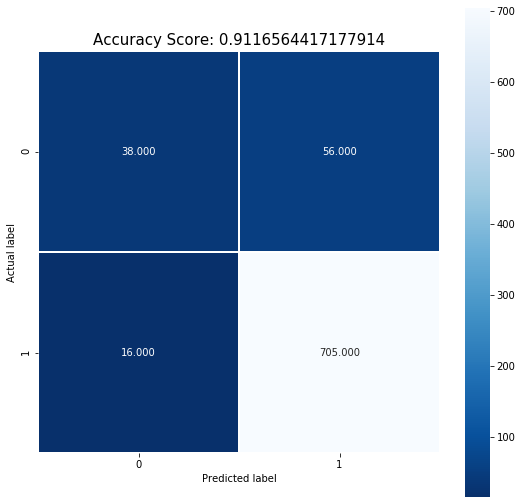

In [57]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);